# Caja de potencial con un tope en el medio



Las cajas de potencial unidimensionales se usan para enseñar y aprender cuántica porque, a pesar de que no existen, son fáciles de resolver y ayudan a irle agarrando la onda al asunto. Esta caja de potencial tiene un "tope" en el centro. Es decir, el potencial vale infinito fuera de la caja, vale cero en las zonas de la izquierda y la derecha (de $-L$ a $-a$ y de $+a$ a $+L$) y vale $U$ en el centro (de $-a$ a $+a$), como se ve en la figura.
<img src="Caja.png" width="500">
La función de onda se obtiene resolviendo la ecuación de Schrödinger
$$-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\Psi(x)+V(x)\Psi(x)=E\Psi(x)$$
con la condición a la frontera de que la solución, $Psi(x)$, debe ser continua y de derivada continua. 

## La condición de continuidad para este problema lleva a la siguiente ecuación
La caja va de $-L$ a $+L$, el tope de $-a$ a $+a$.

La altura del tope es $U$

La solución de la ecuación de Schrödinger lleva a las siguientes ecuaciones, en las que se busca el valor de la energía que las resuelve; la primera es para el caso de una solución par

$$\sqrt{{E\over U-E}}=\tanh{\bigg[\sqrt{{2m(U-E)\over \hbar^2}}a\bigg]} \tan{\bigg[\sqrt{{2mE\over \hbar^2}}(a-L)\bigg]};$$

y la segunda es para el caso de una solución impar,

$$\sqrt{{E\over U-E}}={ \tan{\bigg[\sqrt{{2mE\over \hbar^2}}(a-L)\bigg]} \over \tanh{\bigg[\sqrt{{2m(U-E)\over \hbar^2}}a\bigg]}}.$$

La solución de estas ecuaciones trascendentales se va a buscar con el método de Newton-Raphson, en el que se busca el valor de la variable, $x_s$, que satisface que una función sea igual a cero:

$$f(x_{sol})=0,$$
 
y que está dada aproximadamente por 

$$x_s \approx x_0 - {f(x_0)\over f^\prime(x_0)}$$



Energias de la caja infinita similar [2.4674011002723395, 9.869604401089358, 22.206609902451056, 39.47841760435743, 61.68502750680849, 88.82643960980423, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Energia:  52.526800596529036
2.5313470548085157
0.9999999999999999 0.9999999999999999
9.158226910279453 61.68502750680849


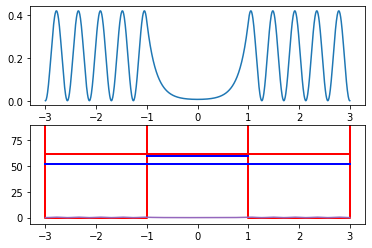

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import simps
# fijamos el valor de los parámetros, masa, L, a y U
me = 0.5
hbar = 1.
L=3.
a=1.
U=60.
coef = np.sqrt(2.*me/hbar**2)
npo = 1000

#Definimos la función par que queremos optimizar
def paraNR(E):
    global arg1, arg2, coef, U
    f = np.tanh(arg1)*np.tan(arg2)+np.sqrt(E/(U-E))
    fp = ((np.tanh(arg1))*coef*(L-a)*.5/(np.sqrt(E)*((np.cos(arg2))**2)) - 
         np.tan(arg2)*(1.-(np.tanh(arg1))**2)*coef*a*.5/np.sqrt(U-E) - 
         .5*U*np.sqrt((U-E)/E)/(U-E)**2)
    return f, fp, E-f/fp

#Definimos la función impar que queremos optimizar
def imparaNR(E):
    global arg1, arg2, coef, U
    f = np.tan(arg2)/np.tanh(arg1)+np.sqrt(E/(U-E))   
    fp = ((np.tanh(arg1))*coef*(L-a)*.5/(np.sqrt(E)*((np.cos(arg2))**2)) - 
         np.tan(arg2)*(1.-(np.tanh(arg1))**2)*coef*a*.5/np.sqrt(U-E) - 
         .5*U*np.sqrt((U-E)/E)/(U-E)**2)
    return f, fp, E-f/fp

# Buscamos soluciones para E<U
#empezamos con el estado basal de la caja sin tope
#E0 = 4.*(hbar*np.pi)**2*(1./(2.*me*(L-a)**2)+1./(2.*me*(2*L)**2))/2.
energiasinf = (hbar*np.pi)**2*(1./(2.*me*(L-a)**2))
nn = 0
E_inf = [0.]*(20)
while energiasinf <= 1.5*U:   
    E_inf[nn]= energiasinf
    energiasinf = (nn+2)**2. * energiasinf / (nn+1)**2.
    nn = nn + 1
print ("Energias de la caja infinita similar", E_inf)

# E0 es la primera aproximación a la energía
E0 = E_inf[0]*.5
#E0 = .5
#E = 4,8,20
E = 54.
for i in range (50):
    arg1 = ((2.*me*(U-E)/hbar**2)**(.5))*a
    arg2 = ((2.*me*(E)/hbar**2)**(.5))*(L-a)
    f, fp, En = paraNR(E)
    #print f, fp, E, En, np.abs(E-En)
    if np.abs(E-En) <= .0001:
        E = En
        conv = 1
        break
    else:
        E=.8*E+ .2*En
        conv = 0
if conv == 0 : 
    print ("No obtuve solucion en 50 vueltas a NR, me detengo!")
    
print ("Energia: ", E)
x_set=np.linspace(-L,L,npo)
Psi = [0]*npo
Psi2 = [0]*npo
k1=np.sqrt(2.*me*E/hbar**2)
k2=np.sqrt(2.*me*(U-E)/hbar**2)
A=1.
C=A*(-np.sin(k1*a)+np.tan(k1*L)*np.cos(k1*a))/(np.exp(k2*a)+np.exp(-k2*a))

for i in range (npo):
    if x_set[i] <= -a:
        Psi[i]=A*(np.sin(k1*x_set[i])+np.tan(k1*L)*np.cos(k1*x_set[i]))
    if x_set[i] > -a and x_set[i] < a:
        #PP[i]
        Psi[i]=C*(np.exp(k2*x_set[i])+np.exp(-k2*x_set[i]))
    if x_set[i] >= a:
        Psi[i]=A*(-np.sin(k1*x_set[i])+np.tan(k1*L)*np.cos(k1*x_set[i]))
    Psi2[i] = Psi[i]*Psi[i]
I = simps(Psi2, x_set)
print (I)
I1 = simps(Psi2/I, x_set)
#PP = simps(Psi2/I, x_set,-1.,1.)
PP = simps(Psi2/I, x_set)
print (I1, PP)
fig, axs = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(x_set,Psi2/I)

#lines = plt.plot(x1, y1, x2, y2)

lines = plt.plot([-3.,-3.,-1,-1.,1.,1.,3.,3.],[1.6*U,0.,0.,1.6*U,1.6*U,0.,0.,1.6*U])
lines2 = plt.plot([-3.,3.],[E,E])

# use keyword args
dif= np.min(np.abs(E-E_inf))
index_min = np.argmin(np.abs(E-E_inf))
print (dif,E_inf[index_min])
lines3 = plt.plot([-3.,3.],[E_inf[index_min],E_inf[index_min]])
lines4 = plt.plot([-1.,1.],[U,U])
plt.setp(lines, color='r', linewidth=2.0)
plt.setp(lines2, color='b', linewidth=2.0)
plt.setp(lines3, color='r', linewidth=2.0)
plt.setp(lines4, color='b', linewidth=2.0)
plt.ylim(-.1*U,1.5*U)
axs[1].plot(x_set,Psi2/I)
#plt.plot(x_set,Psi2/I)
plt.show()


## Autor

Este notebook es una contribución del Dr. Carlos Amador Bedolla